In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os

# Libraries for TensorFlow
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing import image
from tensorflow.keras import models, layers

# Library for Transfer Learning
from tensorflow.keras.applications import resnet50

print("Importing libraries completed.")

Importing libraries completed.


In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [18]:
# listing the folders containing images

# Main Dataset
base_dir="/content/gdrive/My Drive/robotdaun/isirobotdaun"
data_dir = os.path.join(base_dir, 'Datasets')
train_dir = os.path.join(base_dir, 'Train')
val_dir = os.path.join(base_dir, 'Validation')

class_name = os.listdir(data_dir)
val_class_name = os.listdir(val_dir)

In [15]:
#DATASET DIRECTORY
data_bel = os.path.join(data_dir, 'Belimbing Wuluh/')
data_jambu = os.path.join(data_dir, 'Jambu Biji/')
data_jeruk = os.path.join(data_dir, 'Jeruk Nipis/')
data_kemangi = os.path.join(data_dir, 'Kemangi/')
data_lidah = os.path.join(data_dir, 'Lidah Buaya/')
data_nangka = os.path.join(data_dir, 'Nangka/')
data_pandan = os.path.join(data_dir, 'Pandan/')
data_pepaya = os.path.join(data_dir, 'Pepaya/')
data_seledri = os.path.join(data_dir, 'Seledri/')
data_sirih = os.path.join(data_dir, 'Sirih/')

#TRAIN DIRECTORY
train_bel = os.path.join(train_dir, 'Belimbing Wuluh/')
train_jambu = os.path.join(train_dir, 'Jambu Biji/')
train_jeruk = os.path.join(train_dir, 'Jeruk Nipis/')
train_kemangi = os.path.join(train_dir, 'Kemangi/')
train_lidah = os.path.join(train_dir, 'Lidah Buaya/')
train_nangka = os.path.join(train_dir, 'Nangka/')
train_pandan = os.path.join(train_dir, 'Pandan/')
train_pepaya = os.path.join(train_dir, 'Pepaya/')
train_seledri = os.path.join(train_dir, 'Seledri/')
train_sirih = os.path.join(train_dir, 'Sirih/')

#VALIDATION DIRECTORY
val_bel = os.path.join(val_dir, 'Belimbing Wuluh/')
val_jambu = os.path.join(val_dir, 'Jambu Biji/')
val_jeruk = os.path.join(val_dir, 'Jeruk Nipis/')
val_kemangi = os.path.join(val_dir, 'Kemangi/')
val_lidah = os.path.join(val_dir, 'Lidah Buaya/')
val_nangka = os.path.join(val_dir, 'Nangka/')
val_pandan = os.path.join(val_dir, 'Pandan/')
val_pepaya = os.path.join(val_dir, 'Pepaya/')
val_seledri = os.path.join(val_dir, 'Seledri/')
val_sirih = os.path.join(val_dir, 'Sirih/')

In [16]:
import random
from shutil import copyfile

def train_val_split(source, train, val, train_ratio):
  total_size = len(os.listdir(source))
  train_size = int(train_ratio * total_size)
  val_size = total_size - train_size

  randomized = random.sample(os.listdir(source), total_size)
  train_files = randomized[0:train_size]
  val_files = randomized[train_size:total_size]

  for i in train_files:
    i_file = source + i
    destination = train + i
    copyfile(i_file, destination)

  for i in val_files:
    i_file = source + i
    destination = val + i
    copyfile(i_file, destination)

train_ratio = 0.8

source_00 = data_bel
train_00 = train_bel
val_00 = val_bel
train_val_split(source_00, train_00, val_00, train_ratio)

source_01 = data_jambu
train_01 = train_jambu
val_01 = val_jambu
train_val_split(source_01, train_01, val_01, train_ratio)

source_02 = data_jeruk
train_02 = train_jeruk
val_02 = val_jeruk
train_val_split(source_02, train_02, val_02, train_ratio)

source_03 = data_kemangi
train_03 = train_kemangi
val_03 = val_kemangi
train_val_split(source_03, train_03, val_03, train_ratio)

source_04 = data_lidah
train_04 = train_lidah
val_04 = val_lidah
train_val_split(source_04, train_04, val_04, train_ratio)

source_05 = data_nangka
train_05 = train_nangka
val_05 = val_nangka
train_val_split(source_05, train_05, val_05, train_ratio)

source_06 = data_pandan
train_06 = train_pandan
val_06 = val_pandan
train_val_split(source_06, train_06, val_06, train_ratio)

source_07 = data_pepaya
train_07 = train_pepaya
val_07 = val_pepaya
train_val_split(source_07, train_07, val_07, train_ratio)

source_08 = data_seledri
train_08 = train_seledri
val_08 = val_seledri
train_val_split(source_08, train_08, val_08, train_ratio)

source_09 = data_sirih
train_09 = train_sirih
val_09 = val_sirih
train_val_split(source_09, train_09, val_09, train_ratio)


In [19]:
# Preparing Training image data (image array and class name) for processing

# Declaring variables
x=[] # to store array value of the images
y=[] # to store the labels of the images

for folder in os.listdir(data_dir):
    image_list=os.listdir(data_dir+"/"+folder)
    for img_name in image_list:
        # Loading images
        img=image.load_img(data_dir+"/"+folder+"/"+img_name,target_size=(100,100))
        
        # Converting to arrary
        img=image.img_to_array(img)
        
        # Transfer Learning: this is to apply preprocess of resnet to our images before passing it to resnet
        img=resnet50.preprocess_input(img) #  Optional step
        
        # Appending the arrarys
        x.append(img) # appending image array
        y.append(class_name.index(folder)) # appending class index to the array
        
print("Preparing Training Dataset Completed.")

Preparing Training Dataset Completed.


In [20]:
# Preparing validation images data (image array and class name) for processing

# Declaring variables
val_images=[]
val_image_label=[] # to store the labels of the images

for folder in os.listdir(val_dir):
    image_list=os.listdir(val_dir+"/"+folder)
    for img_name in image_list:
        # Loading images
        img=image.load_img(val_dir+"/"+folder+"/"+img_name,target_size=(100,100))
        
        # Converting to arrarys
        img=image.img_to_array(img)

        # Transfer Learning: this is to apply preprocess of resnet to our images before passing it to resnet
        img=resnet50.preprocess_input(img) #  Optional step
        
        # Appending arrays
        val_images.append(img) # appending image array
        val_image_label.append(val_class_name.index(folder))
        
print("Preparing Validation Dataset Completed.")

Preparing Validation Dataset Completed.


In [34]:
print(val_images)

[[[[151.061   138.22101 131.32   ]
   [151.061   138.22101 131.32   ]
   [151.061   138.22101 131.32   ]
   ...
   [151.061   138.22101 131.32   ]
   [151.061   138.22101 131.32   ]
   [151.061   138.22101 131.32   ]]

  [[151.061   138.22101 131.32   ]
   [151.061   138.22101 131.32   ]
   [151.061   138.22101 131.32   ]
   ...
   [151.061   138.22101 131.32   ]
   [151.061   138.22101 131.32   ]
   [151.061   138.22101 131.32   ]]

  [[151.061   138.22101 131.32   ]
   [151.061   138.22101 131.32   ]
   [151.061   138.22101 131.32   ]
   ...
   [151.061   138.22101 131.32   ]
   [151.061   138.22101 131.32   ]
   [151.061   138.22101 131.32   ]]

  ...

  [[151.061   138.22101 131.32   ]
   [151.061   138.22101 131.32   ]
   [151.061   138.22101 131.32   ]
   ...
   [151.061   138.22101 131.32   ]
   [151.061   138.22101 131.32   ]
   [151.061   138.22101 131.32   ]]

  [[151.061   138.22101 131.32   ]
   [151.061   138.22101 131.32   ]
   [151.061   138.22101 131.32   ]
   ...
   [1

In [21]:
# Verifying the output

# Training Dataset
print("Training Dataset")

x=np.array(x) # Converting to np arrary to pass to the model
print(x.shape)

y=to_categorical(y) # onehot encoding of the labels
# print(y)
print(y.shape)


# Validation Dataset
print("Validation Dataset")

val_images=np.array(val_images) 
print(val_images.shape)

val_image_label=to_categorical(val_image_label) # onehot encoding of the labels)
print(val_image_label.shape)

Training Dataset
(3500, 100, 100, 3)
(3500, 10)
Validation Dataset
(700, 100, 100, 3)
(700, 10)


In [22]:
# Check properties of the model that we are going to use for Transfer Learning

print("Summary of default ResNet50 model.\n")

# we are using resnet50 for transfer learnin here. So we have imported it
from tensorflow.keras.applications import resnet50

# initializing model with weights='imagenet'i.e. we are carring its original weights
model_resnet=resnet50.ResNet50(weights='imagenet')

# display the summary to see the properties of the model
model_resnet.summary()

Summary of default ResNet50 model.

102967424/102967424 [==============================] - 1s 0us/step
Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                      

In [23]:
# Modelling WITH Transfer Learning

# Here we will prepare model as per our requirements

print("Summary of Custom ResNet50 model.\n")
print("1) We setup input layer and 2) We removed top (last) layer. \n")

# let us prepare our input_layer to pass our image size. default is (224,224,3). we will change it to (100,100,3)
input_layer=layers.Input(shape=(100,100,3))

# initialize the transfer model ResNet50 with appropriate properties per our need.
# we are passing paramers as following
# 1) weights='imagenet' - Using this we are carring weights as of original weights.
# 2) input_tensor to pass the ResNet50 using input_tensor
# 3) we want to change the last layer so we are not including top layer
resnet_model=resnet50.ResNet50(weights='imagenet',input_tensor=input_layer,include_top=False)

# See the summary of the model with our properties.
resnet_model.summary()

Summary of Custom ResNet50 model.

1) We setup input layer and 2) We removed top (last) layer. 

94765736/94765736 [==============================] - 1s 0us/step
Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 100, 100, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 106, 106, 3)  0           ['input_2[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 50, 50, 64)   9472        ['conv1_pad[0][0]']              
                            

In [24]:
# access the current last layer of the model and add flatten and dense after it

print("Summary of Custom ResNet50 model.\n")
print("1) We flatten the last layer and added 1 Dense layer and 1 output layer.\n")

last_layer=resnet_model.output # we are taking last layer of the model

# Add flatten layer: we are extending Neural Network by adding flattn layer
flatten=layers.Flatten()(last_layer) 

# Add dense layer
# dense1=layers.Dense(100,activation='relu')(flatten)

# Add dense layer to the final output layer
output_layer=layers.Dense(10,activation='softmax')(flatten)

# Creating modle with input and output layer
model=models.Model(inputs=input_layer,outputs=output_layer)

# Summarize the model
model.summary()

Summary of Custom ResNet50 model.

1) We flatten the last layer and added 1 Dense layer and 1 output layer.

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 100, 100, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 106, 106, 3)  0           ['input_2[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 50, 50, 64)   9472        ['conv1_pad[0][0]']              
                                                                                    

In [25]:
# we will freez all the layers except the last layer

# we are making all the layers intrainable except the last layer
print("We are making all the layers intrainable except the last layer. \n")
for layer in model.layers[:-1]:
    layer.trainable=False
model.summary()

We are making all the layers intrainable except the last layer. 

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 100, 100, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 106, 106, 3)  0           ['input_2[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 50, 50, 64)   9472        ['conv1_pad[0][0]']              
                                                                                                  
 conv1_bn (BatchNormalizatio

In [26]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=0.2,random_state=5)
# print(xtrain)
# print(xtest)
# print(ytrain)
# print(ytest)

print("Splitting data for train and test completed.")

Splitting data for train and test completed.


In [27]:
# Compiling Model

model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])

print("Model compilation completed.")

Model compilation completed.


In [28]:
# Fit the Model

model.fit(xtrain,ytrain,epochs=20,batch_size=64,verbose=True,validation_data=(xtest,ytest))

print("Fitting the model completed.")

Epoch 1/20
44/44 [==============================] - 145s 3s/step - loss: 1.7350 - accuracy: 0.7639 - val_loss: 0.4707 - val_accuracy: 0.9229
Epoch 2/20
44/44 [==============================] - 141s 3s/step - loss: 0.1851 - accuracy: 0.9554 - val_loss: 0.4389 - val_accuracy: 0.9186
Epoch 3/20
44/44 [==============================] - 143s 3s/step - loss: 0.0901 - accuracy: 0.9757 - val_loss: 0.2902 - val_accuracy: 0.9414
Epoch 4/20
44/44 [==============================] - 143s 3s/step - loss: 0.0308 - accuracy: 0.9918 - val_loss: 0.2668 - val_accuracy: 0.9486
Epoch 5/20
44/44 [==============================] - 141s 3s/step - loss: 0.0100 - accuracy: 0.9961 - val_loss: 0.2433 - val_accuracy: 0.9543
Epoch 6/20
44/44 [==============================] - 142s 3s/step - loss: 0.0042 - accuracy: 0.9993 - val_loss: 0.2072 - val_accuracy: 0.9614
Epoch 7/20
44/44 [==============================] - 139s 3s/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 0.2108 - val_accuracy: 0.9600
Epoch 8/20
44

In [29]:
# This function helps to predict individual image supplied to it
def predict(img_name):
    img=image.load_img(img_name,target_size=(100,100))
    img=image.img_to_array(img)
    plt.imshow(img.astype('int32'))
    plt.show()
    img=resnet50.preprocess_input(img)
    prediction=model.predict(img.reshape(1,100,100,3))
    output=np.argmax(prediction)
    print(class_name[output])

# This function plots the image supplied in array
def plot_image(i, predictions_array, true_label, img): # taking index and 3 arrays viz. prediction array, true label array and image array
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    
#     plt.imshow(img) # showing b/w image
    plt.imshow(img.astype('int32'))

#     print(*predictions_array)
    predicted_label=np.argmax(predictions_array)
    true_label=np.argmax(true_label)

#     print(predicted_label)
#     print(true_label)

    if predicted_label == true_label: #setting up label color
        color='green' # correct then blue colour
    else:
        color='red' # wrong then red colour
    plt.xlabel("{} {:2.0f}% ({})".format(val_class_name[predicted_label], 100*np.max(predictions_array), val_class_name[true_label]), color=color)

# This function plots bar chart supplied in the array data
def plot_value_array(i, predictions_array, true_label): # taking index along with predictions and true label array
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    predicted_label=np.argmax(predictions_array)
    true_label=np.argmax(true_label)

#     print(predicted_label)
#     print(true_label)
    if predicted_label == 0:
        predicted_label=1
    if true_label == 0:
        true_label=1
    
    thisplot=plt.bar(range(10), predicted_label, color='seashell')
    plt.ylim([0,1])

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('green')

In [30]:
# Preparing prediction arrary
predictions=[]

for img in val_images:
    img=img.reshape(1,100,100,3)
    predictions.append(model.predict(img))

1/1 [==============================] - 0s 104ms/step


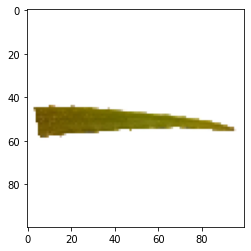

1/1 [==============================] - 0s 124ms/step


Lidah Buaya


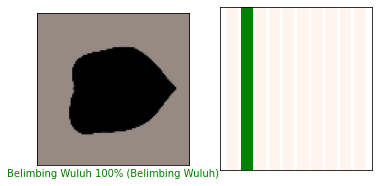

In [43]:
#Run di sini yaa

# Prediction of individual images taken from internet


predict('/content/gdrive/My Drive/robotdaun/isirobotdaun/Datasets/Lidah Buaya/Lidah Buaya005.jpg')

# call the function

# defining parameters to pass to function
i=22 # image number 12. You may change value of i for play around
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)

plot_image(i,predictions, val_image_label, val_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions, val_image_label)
plt.show()

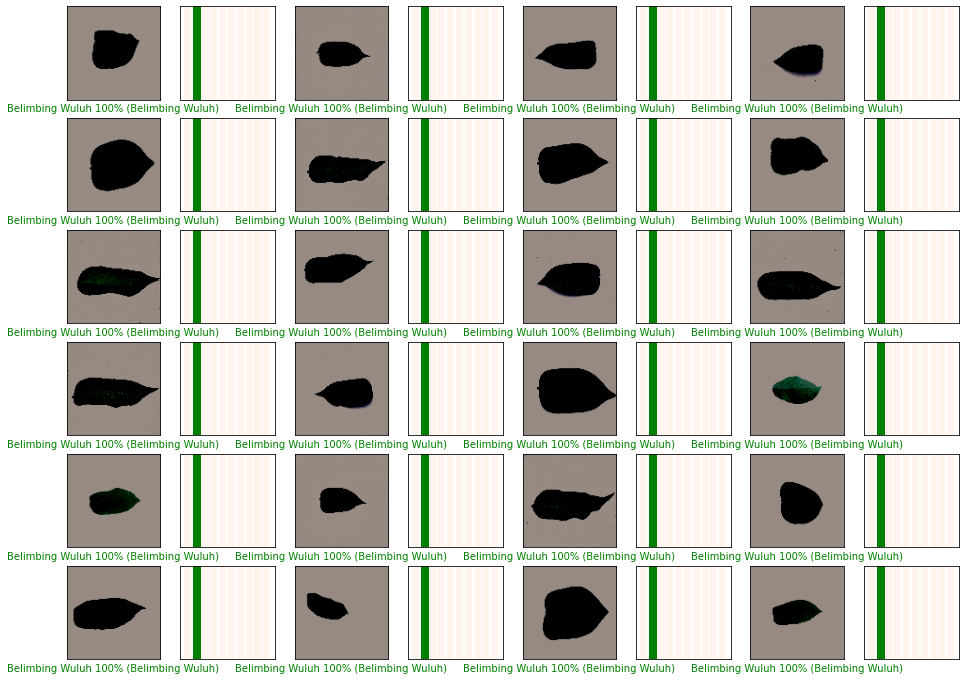

In [32]:
# Prediction on Validation images

# Declaring variables
num_rows=6
num_cols=4
num_images=num_rows*num_cols

plt.figure(figsize=(2*2*num_cols,2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)

    plot_image(i,predictions, val_image_label, val_images)
    
    plt.subplot(num_rows, 2*num_cols, 2*i+2)

    plot_value_array(i, predictions, val_image_label)
plt.show()

In [41]:
print("Notebook completed.")
results = model.evaluate(xtest, ytest)

print("Loss of the model is - ", results[0])
print("Accuracy of the model is - ", results[1]*100, "%")

Notebook completed.
22/22 [==============================] - 29s 1s/step - loss: 0.1940 - accuracy: 0.9600
Loss of the model is -  0.19403958320617676
Accuracy of the model is -  95.99999785423279 %


In [42]:
model.save('/content/gdrive/MyDrive/robotdaun/isirobotdaun/tubes_model_dauns.h5')
%cd /content/gdrive/MyDrive/robotdaun
%ls

/content/gdrive/MyDrive/robotdaun
'001 (1).jpg'                                   'kemangi 2 (4).jpg'
 001.jpg                                        'kemangi 2 (5).jpg'
 002.jpg                                        'kemangi 2.jpg'
 047.jpg                                        'kemangi 3 (1).jpg'
 050.jpg                                        'kemangi 3.jpg'
 Dataset-Daun-Kemangi-dan-Nangka_258_262-main/  'kemangi 4 (1).jpg'
'daunapa (10).jpg'                              'kemangi 4 (2).jpg'
'daunapa (1).jpg'                               'kemangi 4 (3).jpg'
'daunapa (2).jpg'                               'kemangi 4 (4).jpg'
'daunapa (3).jpg'                               'kemangi 4.jpg'
'daunapa (4).jpg'                                model_dauns.h5
'daunapa (5).jpg'                               'nangka 2 (1).jpg'
'daunapa (6).jpg'                               'nangka 2 (2).jpg'
'daunapa (7).jpg'                               'nangka 2 (3).jpg'
'daunapa (8).jpg'                